In [13]:
import math, cmath

import numpy as np
import matplotlib.pyplot as plt

def q(z,w):
    vv = (z*(z-1)*(z-w))
    if abs(vv) < 0.001:
        return 0
    else:
        return abs(vv)/vv


# recursive implementation

In [94]:

def draw_trajectory(z, w, 
                    old_slope, 
                    hv,
                    count=1000, 
                    x_min = -2, x_max = 2, 
                    rotate = 1, 
                    step = 0.005):
    
   
    if abs(q(z,w))<0.001: return
    if count < 0 : return
    #hv is +/-1
    direction = cmath.sqrt(hv/q(z,w))

    slope = direction*step*rotate
    # we have to take the last direction into account 
    #i.e. quadratic differentials determine directions up to \pi (not 2\pi).
    if abs(old_slope.real) < abs(old_slope.imag):
        if old_slope.imag * slope.imag < 0:
            slope *= -1
    elif old_slope.real * slope.real < 0:
        slope *= -1
    # using the slopes to get next position
    z += slope
    x,y = z.real, z.imag
    # clipping
    if not ( x_min < x <  x_max) or not(x_min < y <  x_max) :
        return 
    # plot the line
    Z.append(z) 
    #repeat
    draw_trajectory(z, w, slope, hv,  count=count - 1,  rotate = rotate)
    # at the very first step we also go to the oppposite direction(minus of the slope).
 


# the non recursive version

this is a test - I'll turn it into a function below

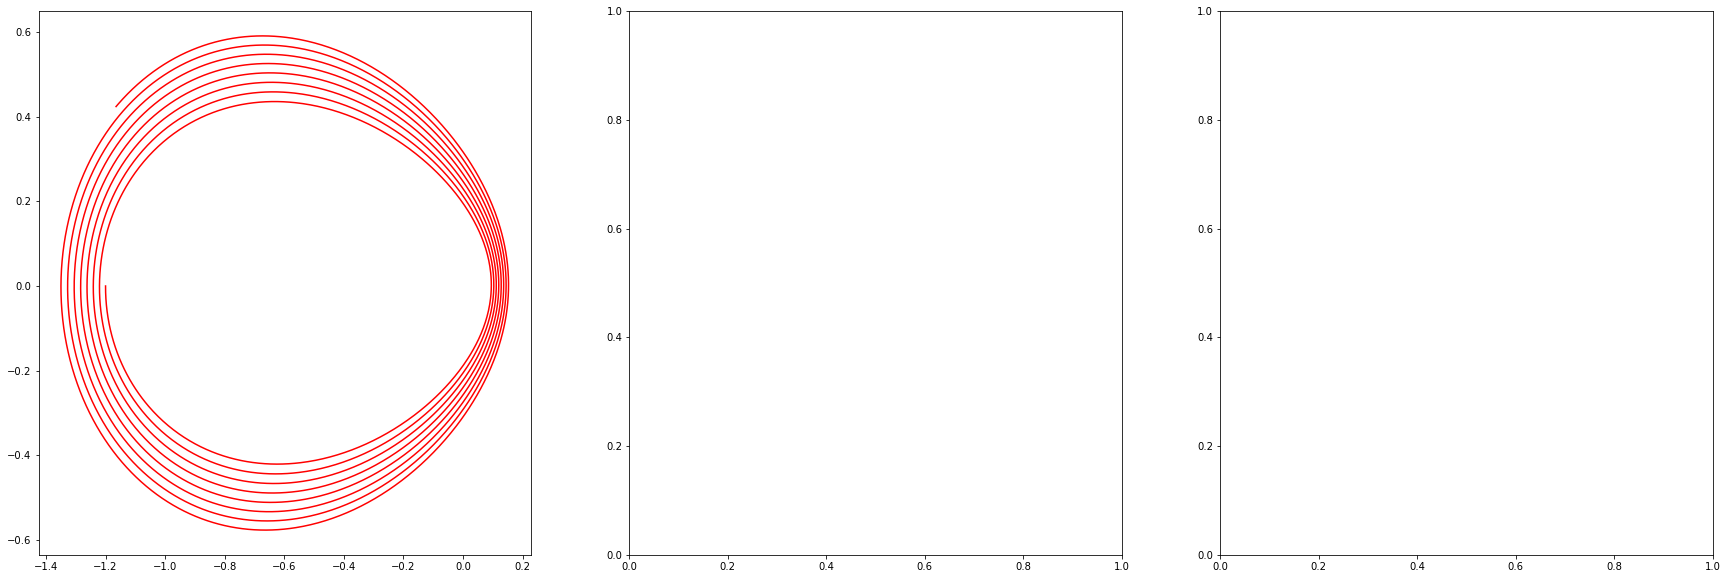

In [117]:
z = -1.2 + 0J
w = -1
rotate = 1
old_slope = 0
hv=1
step = 0.005
x_min = -2
x_max = 2

MAX_ITER = 6000

Z = [z]

for _ in range(MAX_ITER):
    z = Z[-1]
    if abs(q(z,w))<0.001: break
    #hv is +/-1
    slope = step*rotate*cmath.sqrt(hv/q(z,w))
    # we have to take the last direction into account 
    #i.e. quadratic differentials determine directions up to \pi (not 2\pi).
    if abs(old_slope.real) < abs(old_slope.imag):
        if old_slope.imag * slope.imag < 0:
            slope *= -1
    elif old_slope.real * slope.real < 0:
        slope *= -1
    # using the slopes to get next position
    z += slope
    old_slope = slope
    x,y = z.real, z.imag
    # clipping probably shouldn't be done here
    if not ( x_min < x <  x_max) or not(x_min < y <  x_max) :
        break
    # add the point to the list
    Z.append(z) 
    
    
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
 
axes[0].plot([z.real for z in Z], [z.imag for z in Z],'r');

# the non recursive version

In [125]:
def draw_curve(z=-1.2 + 0J,w=-1,
    rotate=1,
    old_slope=0,
    hv=1,
    step = 0.005,
    x_min=-2,
    x_max=2,
    MAX_ITER = 6000):

    Z = [z]
    for _ in range(MAX_ITER):
        z = Z[-1]
        if abs(q(z,w))<0.001: break
        #hv is +/-1
        slope = step*rotate*cmath.sqrt(hv/q(z,w))
        # we have to take the last direction into account 
        #i.e. quadratic differentials determine directions up to \pi (not 2\pi).
        if abs(old_slope.real) < abs(old_slope.imag):
            if old_slope.imag * slope.imag < 0:
                slope *= -1
        elif old_slope.real * slope.real < 0:
            slope *= -1
        # using the slopes to get next position
        z += slope
        old_slope = slope
        x,y = z.real, z.imag
        # clipping probably shouldn't be done here 
        # the curve might leave the box then come back !!!
        if not ( x_min < x <  x_max) or not(x_min < y <  x_max) :
            break
        # add the point to the list
        Z.append(z) 
        
    #this is a trick to make plotting easier
    return np.array(Z)


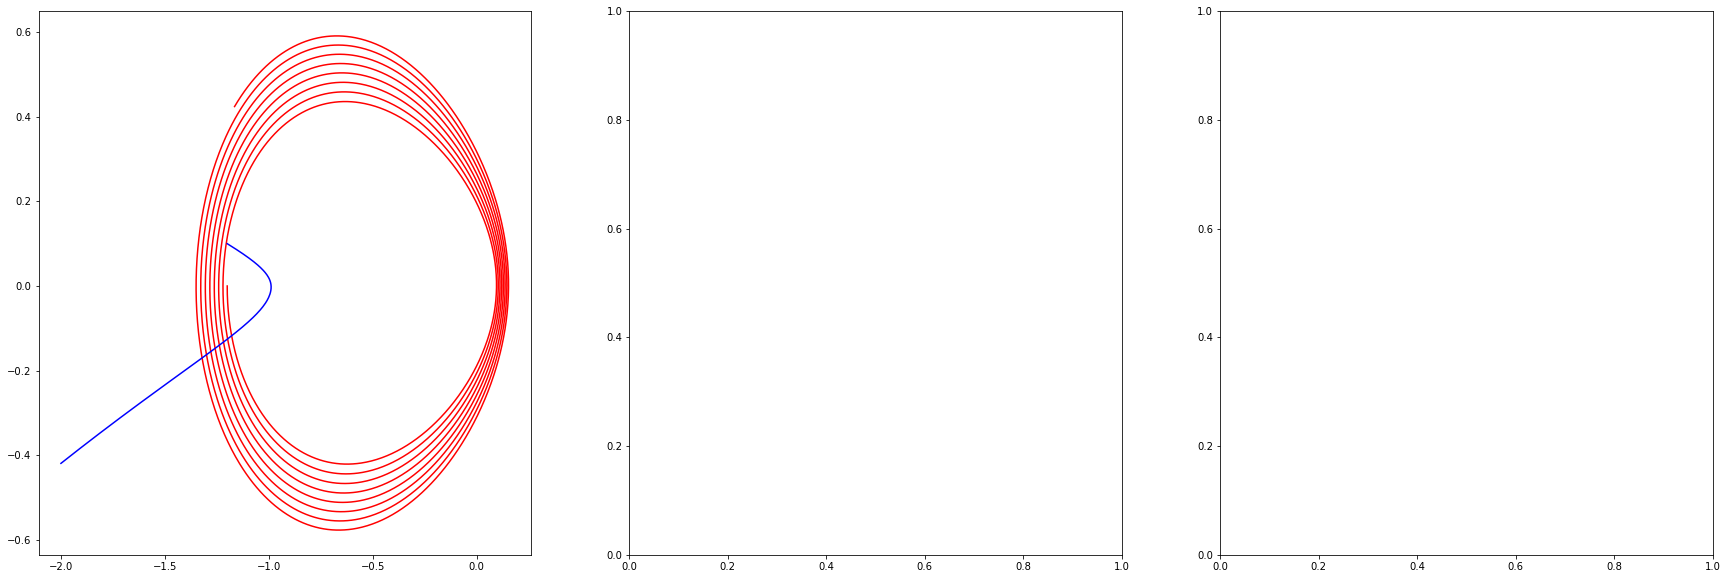

In [129]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

Z = draw_curve()
 
axes[0].plot(Z.real, Z.imag,'r');

Z = draw_curve(z=-1.2+.1J,hv=-1)
axes[0].plot(Z.real, Z.imag,'b');

---
# now look at the tangent vector fields

1. set up a grid
1. calculate the line field
1. draw it with ```plt.quiver```

In [131]:
npts = 20

X = np.linspace(-2, 2, npts)
Y = np.linspace(-2, 2, npts)

#broadcast the xs to a square array
C = X[:, None] + 1J*Y

In [150]:
w = -1
vv = (C*(C-1)*(C-w))
# we should really throw out any np.inf 
vq = np.sqrt(-1*vv/np.abs(vv))*.1
hq = 1J*vq

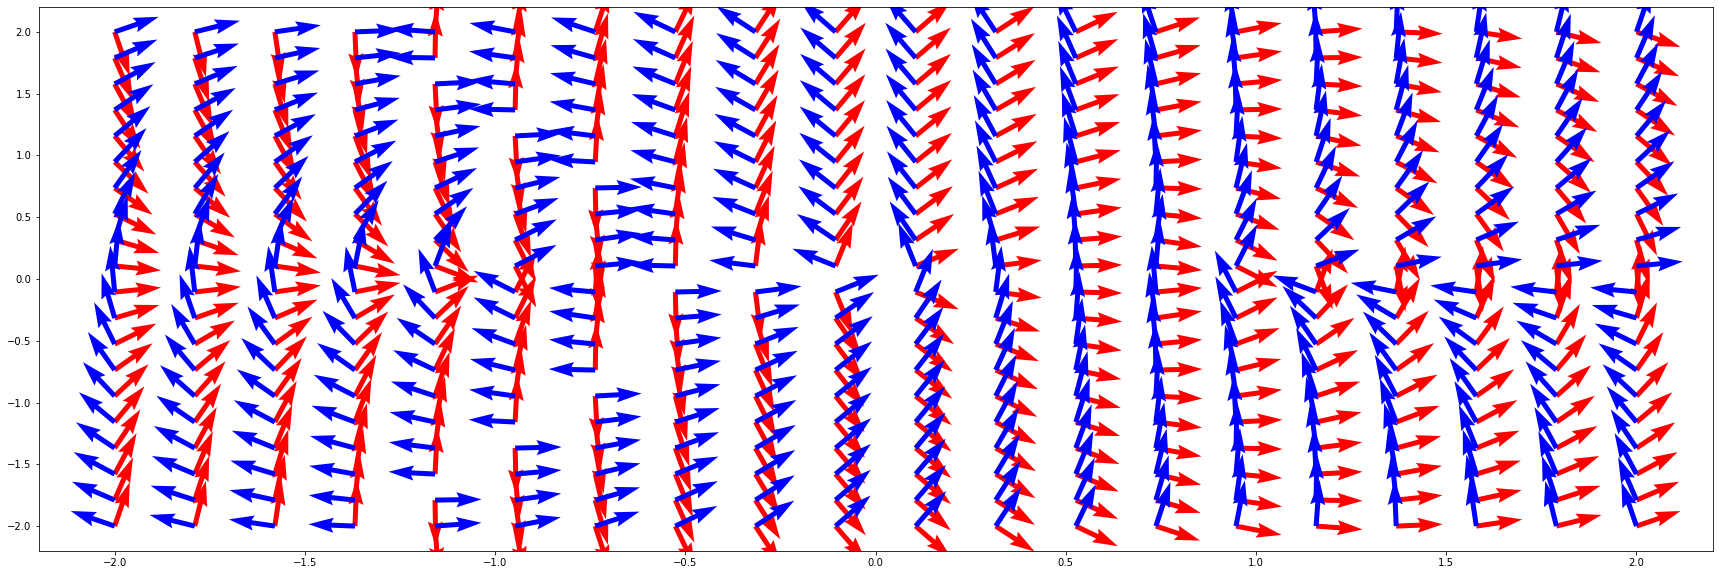

In [157]:
fig, axes = plt.subplots(1, 1, figsize=(30, 10))

plt.quiver(C.real,C.imag,vq.real,vq.imag, color = 'r')
plt.quiver(C.real,C.imag,hq.real,hq.imag, color = 'b');

In [128]:
! ../.g

[master 93fd39b] web
 9 files changed, 3184 insertions(+), 1242 deletions(-)
 create mode 100644 METH_NUM/.ipynb_checkpoints/4-punc-trajectory-checkpoint.ipynb
 create mode 100644 METH_NUM/.ipynb_checkpoints/Untitled1-checkpoint.ipynb
 create mode 100644 METH_NUM/.ipynb_checkpoints/qdiff-checkpoint.ipynb
 create mode 100644 METH_NUM/4-punc-trajectory.ipynb
 create mode 100644 METH_NUM/Untitled1.ipynb
 create mode 100644 METH_NUM/qdiff.ipynb
 rewrite PROG/.ipynb_checkpoints/wordle-checkpoint.ipynb (69%)
Counting objects: 11, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (11/11), done.
Writing objects: 100% (11/11), 3.48 MiB | 149.00 KiB/s, done.
Total 11 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   f9cbfc0..93fd39b  master -> master
